In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
df = pd.read_csv('voice.csv')

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


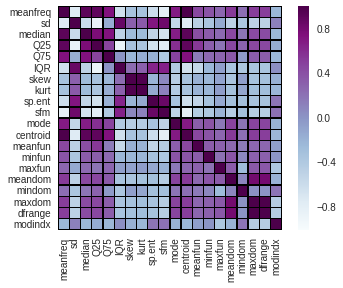

In [4]:
corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black')

In [5]:
col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>


In [6]:
df = df.rename(columns={'label': 'gender'})
df.columns.values

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'gender'],
      dtype=object)

In [18]:
#Lets use SVM:
#Bootstrapping

#Producing X and y
X = df.drop(['gender'], 1)
y = df['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=20,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train accuracy : 0.9763220205209155
Test accuracy : 0.9747634069400631
[[313   7]
 [  9 305]]
0.025236593059936908


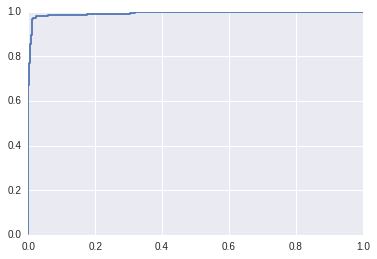

0.9923168789808916


In [19]:

from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#random_state=10))
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)

# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.show()
print(roc_auc)

Train accuracy : 1.0
Test accuracy : 0.7176656151419558
[[320   0]
 [179 135]]
0.2823343848580442


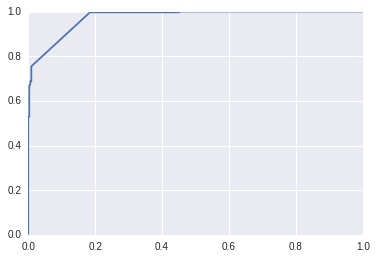

0.9739400875796179


In [20]:
# kernal is rbf
from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'rbf', random_state=10,gamma=8)
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.show()
print(roc_auc)

Train accuracy : 0.6033938437253354
Test accuracy : 0.6025236593059937
[[184 136]
 [116 198]]
0.39747634069400634


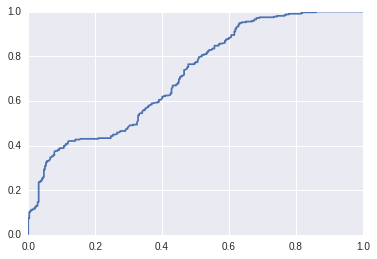

0.713002587579618


In [21]:
#kernel is sigmoid
from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'sigmoid', random_state=0, gamma=1000,coef0=.1)
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.show()
print(roc_auc)

Train accuracy : 0.9108129439621152
Test accuracy : 0.9227129337539433
[[283  37]
 [ 12 302]]
0.07728706624605679


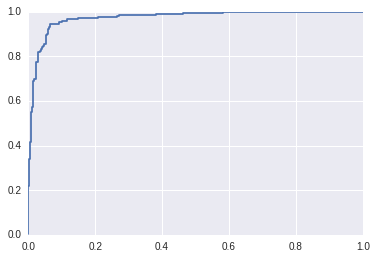

0.9712480095541401


In [22]:
#kernel is polynomial

from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'poly',  degree = 2)
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.show()
print(roc_auc)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>
Train accuracy : 0.9593528018942383
Test accuracy : 0.9684542586750788
[[290  11]
 [  9 324]]
0.031545741324921134


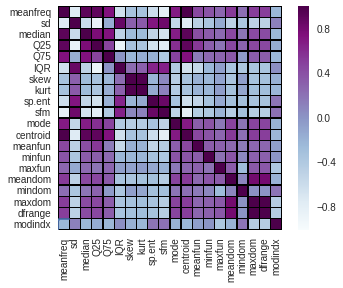

0.9927967834944579


In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('voice.csv')

corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black')

col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

df = df.rename(columns={'label': 'gender'})
df.columns.values

#Lets use SVM:
#Bootstrapping
df1=df[['meanfreq','sd','median','meanfun','gender']]

#Producing X and y
X = df1.drop(['gender'], 1)
y = df1['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=30,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
classifier.fit(X_train, y_train)

print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.show()
print(roc_auc)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>
Train accuracy : 0.9573796369376479
Test accuracy : 0.9668769716088328
[[-0.21877308  0.14757172 -0.73566337]
 [-0.70958955  0.0958238  -1.00885235]
 [ 0.4692413   0.27072924 -0.66945096]
 ...
 [ 0.99233554 -0.27477965 -0.04332505]
 [ 0.81264742 -1.57517895  0.47173126]
 [ 0.955706   -0.70319811  2.25527963]]
[[288  13]
 [  8 325]]
0.033123028391167195


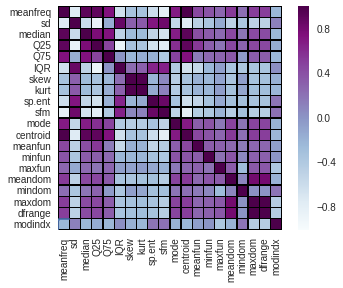

0.9930661558568535


In [24]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('voice.csv')

corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black')

col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

df = df.rename(columns={'label': 'gender'})
df.columns.values

#Lets use SVM:
#Bootstrapping
df1=df[['meanfreq','sd','meanfun','gender']]

#Producing X and y
X = df1.drop(['gender'], 1)
y = df1['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=30,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
classifier.fit(X_train, y_train)

print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))
print(X_test)
y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.show()
print(roc_auc)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>
HERE
[1 1 1 ... 0 0 0]
Train accuracy : 0.9707971586424625
Test accuracy : 0.9779179810725552
[[-0.73566337  0.38339938 -0.44857342 ...  0.14757172  0.70628678
  -0.21877308]
 [-1.00885235  0.52648417 -0.64379762 ...  0.0958238  -0.15253728
  -0.70958955]
 [-0.66945096  0.90946571 -0.09715866 ...  0.27072924 -0.68962433
   0.4692413 ]
 ...
 [-0.04332505  0.17867029  0.49169133 ... -0.27477965 -0.45119447
   0.99233554]
 [ 0.47173126 -1.00886032  0.9677461  ... -1.57517895 -1.33356848
   0.81264742]
 [ 2.25527963 -1.43691758  1.37394757 ... -0.70319811 -0.75449598
   0.955706  ]]
[1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1
 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0

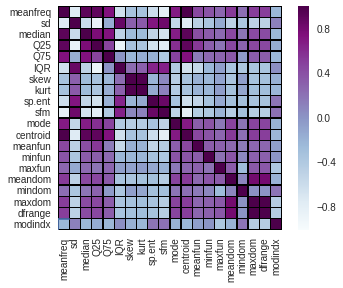

0.9970967645386251


In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('voice.csv')

corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black')

col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

df = df.rename(columns={'label': 'gender'})
df.columns.values

#Lets use SVM:
#Bootstrapping

df1=df[['meanfun','IQR','Q25','sp.ent','sd','sfm','meanfreq','gender']]
#Producing X and y
X = df1.drop(['gender'], 1)
y = df1['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)
print("HERE")
print(y)
#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=30,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print(mcr)


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.show()
print(roc_auc)